In [ ]:
# ! pip install torch

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [4]:
num_sample = 250

# XOR Problem
data0 = np.random.randn(num_sample,2) + (2,2)
data1 = np.random.randn(num_sample,2) + (-2,-2)
data2 = np.random.randn(num_sample,2) + (2,-2)
data3 = np.random.randn(num_sample,2) + (-2,2)

data0 = np.hstack([data0,np.zeros((num_sample,1),dtype=float)])
data1 = np.hstack([data1,np.zeros((num_sample,1),dtype=float)])
data2 = np.hstack([data2,np.ones((num_sample,1),dtype=float)])
data3 = np.hstack([data3,np.ones((num_sample,1),dtype=float)])

data = np.vstack([data0,data1,data2,data3])

data = torch.tensor(data,dtype=torch.float32)

print(data.shape)

torch.Size([1000, 3])


In [8]:
data[:,0]

tensor([ 3.0982e+00,  1.8681e+00,  2.8771e+00,  2.0234e+00,  3.8226e-01,
         2.1738e+00,  1.5661e-01, -4.4123e-02, -2.1074e-01,  2.5835e+00,
         1.3311e+00,  1.4818e+00,  4.0314e-01,  1.1825e+00,  2.5113e+00,
         1.3846e+00,  3.8346e+00,  2.1354e+00,  1.5239e+00,  2.7307e+00,
         2.8448e+00,  1.2434e+00,  2.4877e+00,  2.9789e+00,  2.2821e+00,
         1.4428e+00,  1.9788e+00,  1.1340e+00,  1.7111e+00,  1.0864e+00,
         3.7544e+00,  1.2627e+00,  1.4036e+00,  2.7697e+00,  6.7688e-01,
         1.5185e+00,  2.2191e+00,  2.0669e+00,  3.8007e+00,  1.5934e+00,
         2.2092e+00,  1.7849e+00,  1.3960e+00,  1.4388e+00,  3.0348e+00,
         1.7917e+00,  2.4974e+00,  2.4768e+00,  9.3197e-01,  6.0523e-01,
         3.2332e+00,  2.4729e+00,  1.2140e+00,  5.3559e-01,  1.4135e+00,
         2.4525e+00,  2.4024e+00,  2.9988e-01,  1.1245e+00,  2.4944e+00,
         9.5440e-01,  4.2771e+00,  1.1541e+00,  2.4820e+00,  3.3080e+00,
         7.2249e-01,  4.0970e+00,  2.1793e+00,  6.4

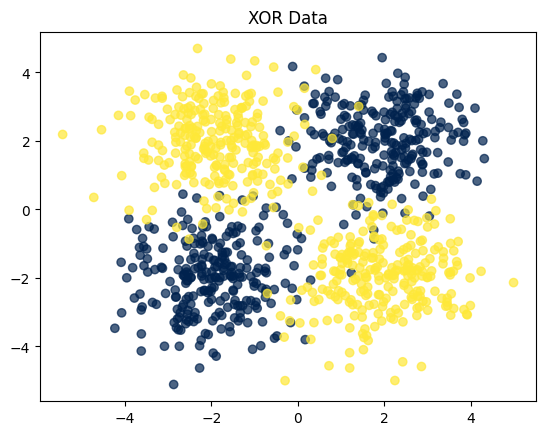

In [22]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,-1], cmap="cividis", alpha=0.7)
plt.title("XOR Data")
plt.show()

In [23]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # input.sim = 2 -> output.sim = 1
        self.linear1 = nn.Linear(2,3)
        self.linear2 = nn.Linear(3,3)
        self.linear3 = nn.Linear(3,1)

    def forward(self,x):
        x = F.leaky_relu(self.linear1(x))
        x = F.tanh(self.linear2(x))
        output = self.linear3(x) # softmax를 취하지 않은 쌩 값을 logit이라고 부른다. 

        return output

(`F.sigmoid(x)` - `nn.BCELoss()`) 는 log 0 일 때 이슈가 존재 (delta 값 필요)  

대안(더 일반적임)  

(`logit` - `nn.BCEWithLogitsLoss()` )

In [45]:
model = LogisticRegression()
loss_ftn = nn.BCEWithLogitsLoss() # nn.BCELoss()를 쓰고 싶으면 sigmoid를 씌워야 하지만, 얘는 안 씌워도 됨 대신 쌍으로 같이 가야 함 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [46]:
num_epoch = 200
loss_list = list()

for i in range(num_epoch):
    perm = np.random.permutation(len(data))
    total_loss = 0
    count = 0

    for j in range(len(data)):

        x = data[perm[j]][:-1]
        y = data[perm[j]][-1]# shape=(1,1)
        y = y.reshape([1])# shape=(1,)

        #### HERE ####
        logit = model(x)
        prob = F.sigmoid(logit)

        cost = loss_ftn(logit, y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        total_loss += cost.item()

        pred = torch.round(prob).item()
        count += (pred == y.item())

    acc = count / len(data) * 100

    loss_list.append(total_loss)

    if i % 10 == 0:
        print(f"Epoch {i} | total loss : {total_loss / len(data):.3f} | acc : {acc:.1f} %")

Epoch 0 | total loss : 0.652 | acc : 63.8 %
Epoch 10 | total loss : 0.280 | acc : 92.4 %
Epoch 20 | total loss : 0.192 | acc : 93.5 %
Epoch 30 | total loss : 0.171 | acc : 93.6 %
Epoch 40 | total loss : 0.162 | acc : 93.9 %
Epoch 50 | total loss : 0.159 | acc : 94.1 %
Epoch 60 | total loss : 0.159 | acc : 94.0 %
Epoch 70 | total loss : 0.157 | acc : 93.8 %
Epoch 80 | total loss : 0.156 | acc : 94.1 %
Epoch 90 | total loss : 0.155 | acc : 94.0 %
Epoch 100 | total loss : 0.156 | acc : 94.1 %
Epoch 110 | total loss : 0.155 | acc : 94.2 %
Epoch 120 | total loss : 0.155 | acc : 94.1 %
Epoch 130 | total loss : 0.154 | acc : 94.0 %
Epoch 140 | total loss : 0.154 | acc : 94.3 %
Epoch 150 | total loss : 0.153 | acc : 94.1 %
Epoch 160 | total loss : 0.153 | acc : 94.3 %
Epoch 170 | total loss : 0.151 | acc : 94.6 %
Epoch 180 | total loss : 0.151 | acc : 94.3 %
Epoch 190 | total loss : 0.150 | acc : 94.4 %
